In [1]:
import networkx as nx

from autograd import grad, value_and_grad
import autograd.numpy as np
import numpy as onp

import pandas as pd
import random
from functools import partial
import itertools
from tqdm.autonotebook import tqdm  # , trange


import matplotlib.pyplot as plt 

/home/tbsexton/miniconda3/envs/eng-net/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  # This is added back by InteractiveShellApp.init_path()


In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('organizing-tags'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.invite import sample_censored
from src.models import CensoredRW, train
from src.tools import cosine_model, markov_model
from src.tools import minmax, symmetrize  # , fill_diagonal, labeled_adj

In [8]:
G=nx.watts_strogatz_graph(30, 4, .166)
nx.set_edge_attributes(G, 1, 'weight')

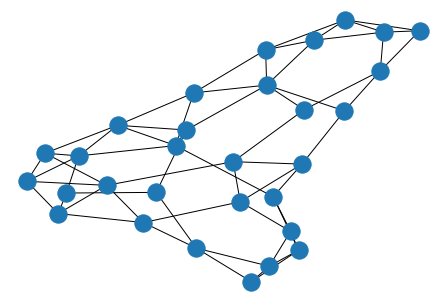

In [9]:
nx.draw(G)

In [34]:
M = sample_censored(G, 50, 5, demo=False)

In [35]:
M

[array([18, 19,  8, 17, 11]),
 array([1, 3, 2, 0, 4]),
 array([ 0,  2,  1,  3, 28]),
 array([2, 4, 3, 1, 0]),
 array([29,  0,  1, 28,  6]),
 array([25, 23, 21, 24, 19]),
 array([22, 20, 19, 18, 17]),
 array([16, 19, 18,  8,  9]),
 array([21, 22, 24, 20, 23]),
 array([15, 17, 16, 19, 18]),
 array([29,  0, 28, 26, 25]),
 array([29,  6,  7, 10,  9]),
 array([2, 4, 6, 8, 9]),
 array([25, 23, 26, 28,  0]),
 array([ 2,  4,  5,  6, 29]),
 array([7, 5, 6, 8, 9]),
 array([13, 14, 27, 26, 28]),
 array([19, 16, 15, 13, 14]),
 array([20, 21, 19, 22, 24]),
 array([3, 5, 7, 4, 6]),
 array([24, 23, 22, 25, 26]),
 array([20, 22, 21, 23, 25]),
 array([16, 15, 25, 26, 13]),
 array([28, 26, 27, 29,  6]),
 array([1, 3, 4, 5, 7]),
 array([16, 19, 20, 21, 23]),
 array([29, 27, 26, 24,  0]),
 array([29,  6,  8, 18, 17]),
 array([25, 26, 24, 22, 23]),
 array([29, 27, 25, 16, 19]),
 array([29,  6, 27,  5,  7]),
 array([27, 26, 14, 15, 13]),
 array([3, 2, 1, 4, 5]),
 array([23, 25, 26, 27, 24]),
 array([13, 14,

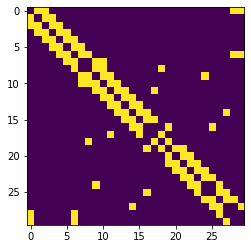

In [36]:
A = nx.to_numpy_array(G)
N = G.number_of_nodes()
plt.imshow(A)

In [37]:
from src.autograd import loss, loss_i

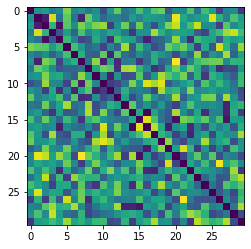

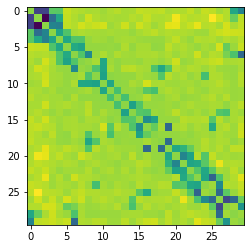

In [38]:
B = np.random.rand(*A.shape)
B = B.T + B - 2*np.diag(B.diagonal())

l, B_p = value_and_grad(partial(loss, M))(B)

plt.imshow(B)
plt.figure()
plt.imshow(B_p)

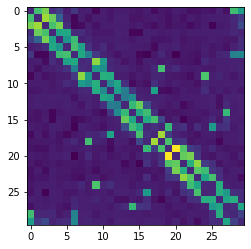

In [32]:
plt.imshow(B - B_p)